In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
df = pd.read_csv('IT_customer_churn.csv')
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3293,Female,0,No,No,5,Yes,Yes,DSL,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check,64.00,370.25,No
4952,Male,0,No,No,2,Yes,No,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,100.20,198.5,No
3510,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.25,576.7,No
6838,Male,0,No,No,13,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,99.00,1301.7,Yes
906,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,56.40,234.85,No


In [3]:
#EDA
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#หลังจากดู data type พบว่าสดมภ์ TotalCharges เป้น object แต่ในข้อมูลมันควรจะเป็น Float เนื่องจากเป็นตัวเลขและมีจุดทศนิยม
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [13]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [15]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
df.iloc[488].TotalCharges

' '

In [19]:
df[df.TotalCharges!=' '].shape

(7033, 20)

In [21]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7033, 20)

In [23]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [25]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [27]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [29]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


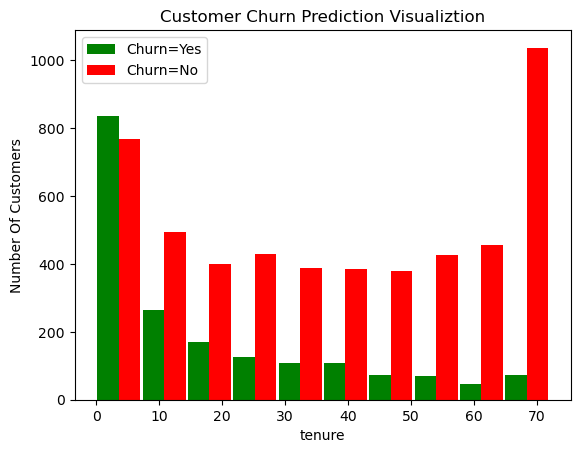

In [31]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

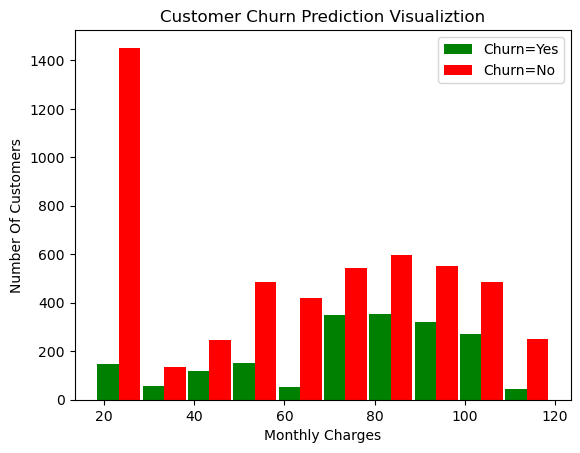

In [33]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [35]:
#Data Preprocessing
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [37]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [39]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [41]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [43]:
#convert yes and no to 1 or 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [45]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39
  0]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [47]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [49]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [51]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [53]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1179,0,1,1,0,43,1,1,0,1,0,...,False,True,False,True,False,False,False,False,True,False
4155,1,1,0,0,72,1,1,1,1,1,...,False,True,False,False,False,True,False,True,False,False
2848,0,0,1,1,24,1,0,1,0,1,...,True,False,False,False,True,False,False,True,False,False
698,0,1,1,1,47,1,0,0,1,0,...,False,True,False,False,True,False,True,False,False,False
4573,0,0,1,1,72,1,0,0,0,0,...,False,False,True,False,False,True,False,False,True,False


In [55]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [57]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [59]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.54166667
 0.        ]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechS

In [61]:
df2.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

In [63]:
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7033, dtype: bool

In [65]:
df2.drop_duplicates()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,0.472222,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,0.027778,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,0.625000,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,0.027778,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.333333,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,1,0,1,1,1.000000,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,1,0,1,1,0.152778,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,0,1,1,0,0.055556,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7033 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7033 non-null   int64  
 1   SeniorCitizen                            7033 non-null   int64  
 2   Partner                                  7033 non-null   int64  
 3   Dependents                               7033 non-null   int64  
 4   tenure                                   7033 non-null   float64
 5   PhoneService                             7033 non-null   int64  
 6   MultipleLines                            7033 non-null   int64  
 7   OnlineSecurity                           7033 non-null   int64  
 8   OnlineBackup                             7033 non-null   int64  
 9   DeviceProtection                         7033 non-null   int64  
 10  TechSupport                              7033 non-nul

In [70]:
Q1 = df2['tenure'].quantile(0.25)
Q3 = df2['tenure'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_tenure = df2[(df2['tenure']<lower_bound) | (df2['tenure']>upper_bound)]
if Outliers_tenure.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ tenure")
else:
    print(Outliers_Age['tenure'])

-0.8333333333333333
1.722222222222222
ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ tenure


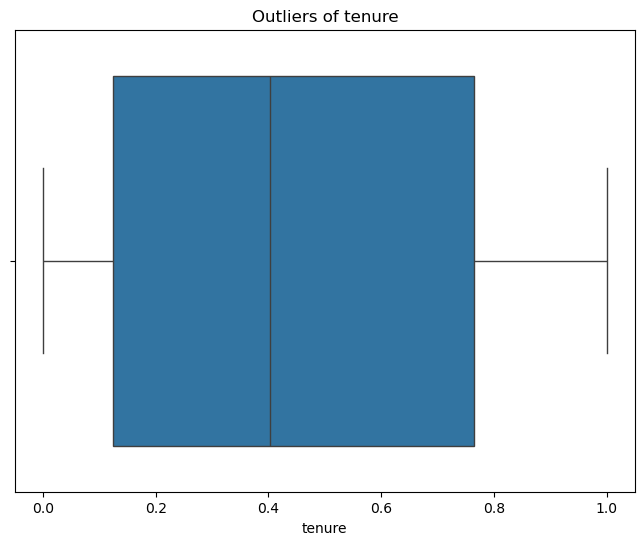

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df2['tenure'])

plt.title('Outliers of tenure')
plt.xlabel('tenure')

plt.show()

In [74]:
Q1 = df2['MonthlyCharges'].quantile(0.25)
Q3 = df2['MonthlyCharges'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_MonthlyCharges = df2[(df2['MonthlyCharges']<lower_bound) | (df2['MonthlyCharges']>upper_bound)]
if Outliers_MonthlyCharges.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ MonthlyCharges")
else:
    print(Outliers_Age['MonthlyCharges'])

-0.6370646766169153
1.522139303482587
ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ MonthlyCharges


In [76]:
Q1 = df2['TotalCharges'].quantile(0.25)
Q3 = df2['TotalCharges'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_TotalCharges = df2[(df2['TotalCharges']<lower_bound) | (df2['TotalCharges']>upper_bound)]
if Outliers_TotalCharges.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ TotalCharges")
else:
    print(Outliers_Age['TotalCharges'])

-0.5431340872374798
1.0229863835679667
ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ TotalCharges


In [82]:
# X,Y Train test split
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [86]:
y_train.shape

(4923,)

In [82]:
y.value_counts()

Churn
0.0    5164
1.0    1869
Name: count, dtype: int64

In [88]:
IR = 5163/1869
print("ค่า Imbalance Ratio มีค่า = ",IR)

ค่า Imbalance Ratio มีค่า =  2.7624398073836276


In [102]:
# แยก Features และ Target
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [90]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.neighbors import NearestNeighbors

# Define the Gram matrix-based synthetic sample generation function
def gram_matrix_synthetic_samples(X, sv_indices, sv_labels, kernel='rbf', gamma=None, sv_ratio=0.5, k_neighbors=5):
    # Step 1: Compute the Gram Matrix
    if kernel == 'rbf':
        if gamma is None:
            gamma = 1 / (X.shape[1] * X.var())
        gram_matrix = rbf_kernel(X[sv_indices], X[sv_indices], gamma=gamma)
    
    # Step 2: Classify SVs as concave, convex, or noise
    nbrs = NearestNeighbors(n_neighbors=k_neighbors).fit(X[sv_indices])  # Use sv_indices for neighbor search
    X_synthetic = []
    
    for i, sv in enumerate(sv_indices):
        distances, neighbors = nbrs.kneighbors([X[sv]], n_neighbors=k_neighbors)
        majority_count = sum(sv_labels[neighbors[0]] != sv_labels[i])  # Fix indexing issue here
        
        if majority_count == k_neighbors:  # Noise sample
            continue
        elif majority_count >= k_neighbors / 2:  # Convex sample (Inward generation)
            for _ in range(int(sv_ratio * k_neighbors)):
                random_index = np.random.randint(0, len(sv_indices))
                new_sample = X[sv] + np.random.uniform(0, 1) * (X[sv_indices[random_index]] - X[sv])
                X_synthetic.append(new_sample)
        else:  # Concave sample (Outward generation)
            for _ in range(int(sv_ratio * k_neighbors)):
                random_index = np.random.randint(0, len(sv_indices))
                new_sample = X[sv] + np.random.uniform(-1, 0) * (X[sv_indices[random_index]] - X[sv])
                X_synthetic.append(new_sample)

    return np.array(X_synthetic)

# Define Adaptive SV-Borderline SMOTE based on the paper
def adaptive_sv_borderline_smote(X, y, kernel='rbf', gamma=None, sv_ratio=0.5, k_neighbors=5):
    # Convert X and y to numpy array if they are not already
    X = X.values if isinstance(X, pd.DataFrame) else X
    y = y.values if isinstance(y, pd.Series) else y  # แปลง y เป็น numpy array
    
    # Step 1: Train SVM to find support vectors
    svm = SVC(kernel=kernel, probability=True, gamma='scale' if gamma is None else gamma, random_state=42)
    svm.fit(X, y)
    
    # Step 2: Identify support vectors (SVs)
    support_vectors = svm.support_
    
    # Step 3: Assign labels to support vectors
    sv_labels = y[support_vectors]  # ตอนนี้ y เป็น numpy array แล้ว อินเด็กซ์จะตรงกัน
    
    # Step 4: Generate synthetic samples using Gram matrix in kernel space
    X_synthetic = gram_matrix_synthetic_samples(X, support_vectors, sv_labels, kernel=kernel, gamma=gamma, sv_ratio=sv_ratio, k_neighbors=k_neighbors)
    
    # Combine original data with synthetic samples
    X_resampled = np.vstack((X, X_synthetic))
    y_resampled = np.hstack((y, np.full(len(X_synthetic), np.max(y))))  # Assign minority class label to synthetic samples
    
    return X_resampled, y_resampled


# Example usage of Adaptive SV-Borderline SMOTE
X_train_smote, y_train_smote = adaptive_sv_borderline_smote(X_train, y_train, kernel='rbf', gamma=None)

In [112]:
X_train_smote=pd.DataFrame(data=X_train_smote)
X_train_smote.shape

(9665, 26)

In [102]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Updated evaluate_model function
def evaluate_model(model_name, y_val, y_pred, y_prob=None):
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    
    # If probability scores are provided, calculate AUC and plot ROC curve
    if y_prob is not None:
        auc = roc_auc_score(y_val, y_prob)
        print(f"AUC: {auc:.4f}")
        fpr, tpr, _ = roc_curve(y_val, y_prob)
        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} ROC curve (AUC = {auc:.4f})')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
    else:
        auc = None
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    return accuracy, precision, recall, auc


In [104]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Updated evaluate_model function to accept 4 parameters
def evaluate_model(model_name, y_val, y_pred, y_prob=None):
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    
    # If probability scores are provided, calculate AUC and plot ROC curve
    if y_prob is not None:
        auc = roc_auc_score(y_val, y_prob)
        print(f"AUC: {auc:.4f}")
        fpr, tpr, _ = roc_curve(y_val, y_prob)
        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} ROC curve (AUC = {auc:.4f})')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend(loc='lower right')
        plt.show()
    else:
        auc = None
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    
    return accuracy, precision, recall, auc


Confusion Matrix:
[[1002  547]
 [ 105  456]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.65      0.75      1549
         1.0       0.45      0.81      0.58       561

    accuracy                           0.69      2110
   macro avg       0.68      0.73      0.67      2110
weighted avg       0.79      0.69      0.71      2110

AUC: 0.7882


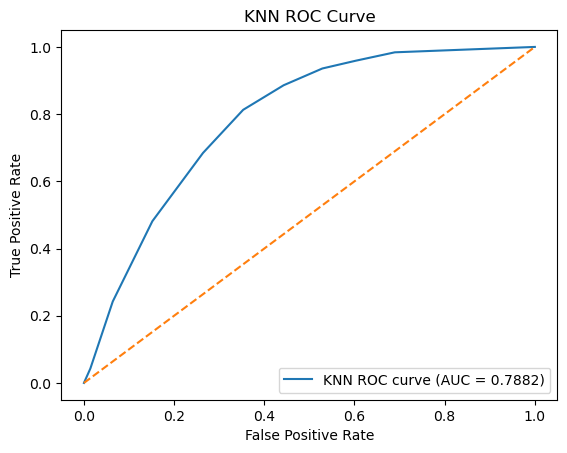

Accuracy: 0.6910
Precision: 0.4546
Recall: 0.8128


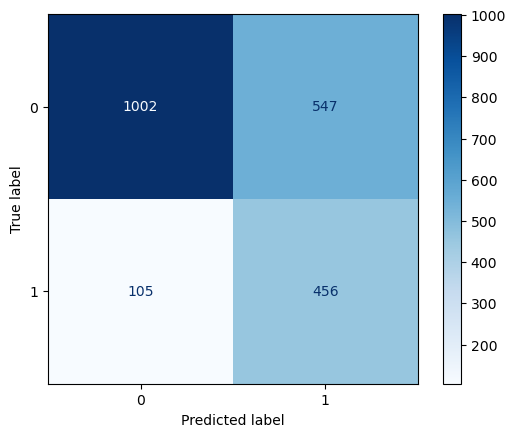

Best parameters found by GridSearchCV for KNN:
{'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}


In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Define the parameter grid for KNN
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9,],       # Number of neighbors to use
    'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'knn__metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a pipeline to scale the data and apply KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Step to scale the data
    ('knn', KNeighborsClassifier())          # KNeighborsClassifier model
])

# GridSearchCV with pipeline for KNN
grid_search_knn = GridSearchCV(pipeline, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_knn.fit(X_train_smote, y_train_smote)

# Predict and evaluate KNN
knn_best = grid_search_knn.best_estimator_
y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:, 1]

# Print metrics (Assuming the same print_metrics function exists)
evaluate_model("KNN", y_test, y_pred_knn, y_prob_knn)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters for KNN
print("Best parameters found by GridSearchCV for KNN:")
print(grid_search_knn.best_params_)

Confusion Matrix:
[[1036  513]
 [ 106  455]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77      1549
         1.0       0.47      0.81      0.60       561

    accuracy                           0.71      2110
   macro avg       0.69      0.74      0.68      2110
weighted avg       0.79      0.71      0.72      2110

AUC: 0.8071


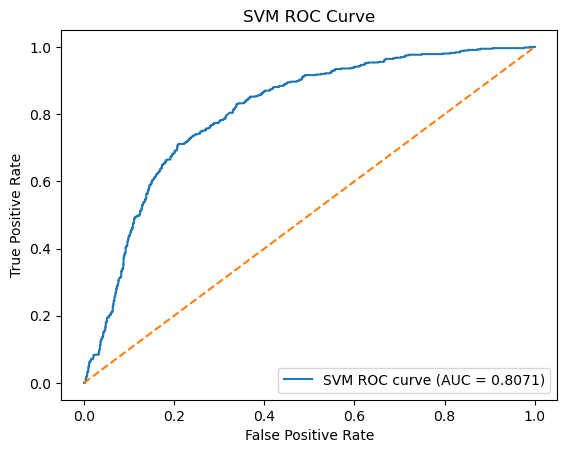

Accuracy: 0.7066
Precision: 0.4700
Recall: 0.8111


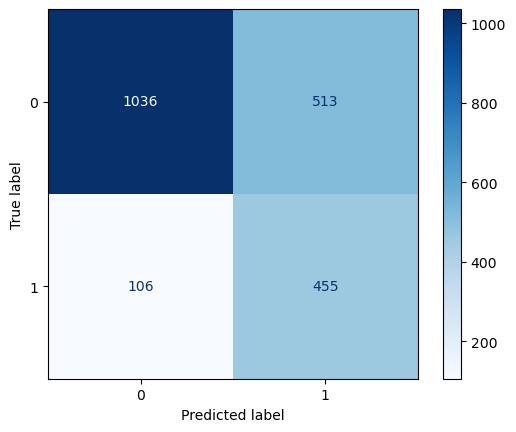

Best parameters found by GridSearchCV:
{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [108]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid for SVM
param_grid_svm = {'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 'auto'], 'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a pipeline to scale the data and apply SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('svc', SVC(probability=True))  # SVC model with probability=True
])

# GridSearchCV with pipeline
grid_search_svm = GridSearchCV(pipeline, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_svm.fit(X_train_smote, y_train_smote)

# Predict and evaluate SVM
svm_best = grid_search_svm.best_estimator_
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:, 1]

# Print metrics
evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search_svm.best_params_)

Confusion Matrix:
[[1079  470]
 [ 102  459]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.70      0.79      1549
         1.0       0.49      0.82      0.62       561

    accuracy                           0.73      2110
   macro avg       0.70      0.76      0.70      2110
weighted avg       0.80      0.73      0.74      2110

AUC: 0.8265


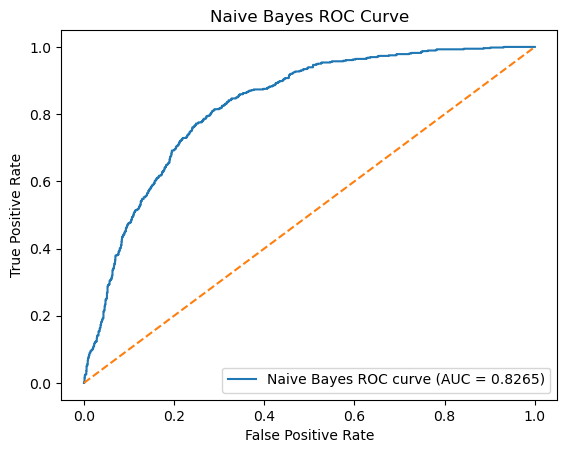

Accuracy: 0.7289
Precision: 0.4941
Recall: 0.8182


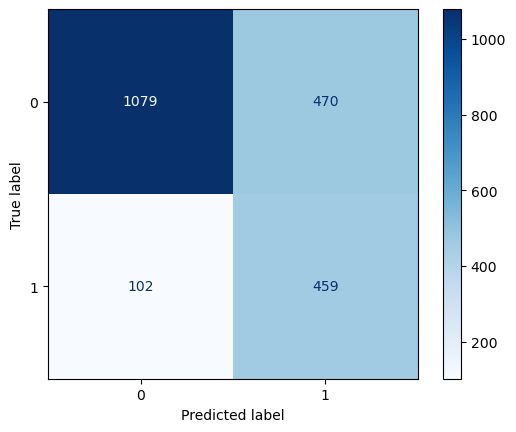

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Since GaussianNB does not have many hyperparameters to tune, we will just fit it in the pipeline
param_grid_nb = {}

# Create a pipeline to scale the data and apply GaussianNB
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('nb', GaussianNB())            # GaussianNB model
])

# GridSearchCV with pipeline (no parameter grid for Naive Bayes)
grid_search_nb = GridSearchCV(pipeline, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_nb.fit(X_train_smote, y_train_smote)

# Predict and evaluate Naive Bayes
nb_best = grid_search_nb.best_estimator_
y_pred_nb = nb_best.predict(X_test)
y_prob_nb = nb_best.predict_proba(X_test)[:, 1]

# Print metrics (Assuming the same print_metrics function exists)
evaluate_model("Naive Bayes", y_test, y_pred_nb, y_prob_nb)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()


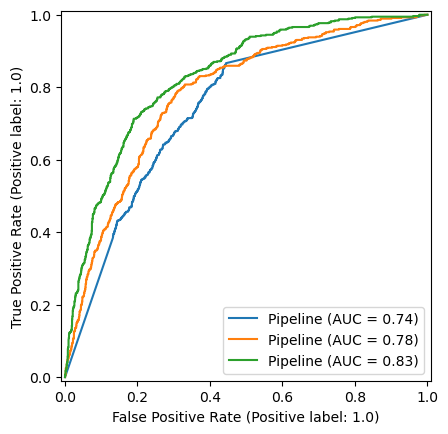

In [100]:
# ROC curve for all models
plt_roc = RocCurveDisplay.from_estimator(knn_best, X_test, y_test)
RocCurveDisplay.from_estimator(svm_best, X_test, y_test, ax=plt_roc.ax_)
RocCurveDisplay.from_estimator(nb_best, X_test, y_test, ax=plt_roc.ax_)
plt.show()